## 직방 아파트 가격 예측 : 모델링

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

### 1. 데이터 불러와서 살펴보기.

In [2]:
os.chdir(r'..\data')

In [3]:
df = pd.read_csv('data_zigbang_3.csv', header='infer',encoding = 'latin')

In [4]:
df.shape

(301400, 32)

In [5]:
df.head(3)

,apartment_id,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,...,transaction_quarter,old,area_ratio,parking_household,y,old_cat,room_count_cat,bathroom_count_cat,parking_household_cat,floor_cat
0,15492,201601,15,2008,94.51,2,37.574417,126.968883,1111011500,1480.0,...,1,8,0.834599,2.252664,20.554847,a,b,b,b,a
1,15492,201601,15,2008,94.28,12,37.574417,126.968883,1111011500,1480.0,...,1,8,0.834706,2.252664,20.500122,a,b,b,b,a
2,9174,201601,15,2003,48.54,9,37.575113,126.990056,1111013300,228.0,...,1,13,0.806983,0.783505,19.519293,a,b,b,a,a


### 2. 가변수.

In [6]:
df = pd.get_dummies(df,drop_first=True)

In [7]:
df.shape

(301400, 34)

In [8]:
features = list(df.columns)

In [9]:
exclude_list = ['y', 'transaction_real_price', 'apartment_id', 'latitude', 'longitude', 'room_id', 'address_by_law']
X_features = [ x for x in df.columns if x not in exclude_list ]

In [10]:
X_features

['transaction_year_month',
 'transaction_date',
 'year_of_completion',
 'exclusive_use_area',
 'floor',
 'total_parking_capacity_in_site',
 'total_household_count_in_sites',
 'apartment_building_count_in_sites',
 'tallest_building_in_sites',
 'lowest_building_in_sites',
 'supply_area',
 'total_household_count_of_area_type',
 'room_count',
 'bathroom_count',
 'transaction_year',
 'transaction_month',
 'transaction_quarter',
 'old',
 'area_ratio',
 'parking_household',
 'old_cat_b',
 'old_cat_c',
 'room_count_cat_b',
 'bathroom_count_cat_b',
 'parking_household_cat_b',
 'floor_cat_b',
 'floor_cat_c']

### 3. R 스타일의 formula를 사용한 모델링.

In [11]:
myModel1 = smf.ols(formula = "transaction_real_price ~ " + " + ".join(X_features), data=df)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     transaction_real_price   R-squared:                       0.525
Model:                                OLS   Adj. R-squared:                  0.525
Method:                     Least Squares   F-statistic:                 1.386e+04
Date:                    Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                            13:50:10   Log-Likelihood:            -6.2943e+06
No. Observations:                  301400   AIC:                         1.259e+07
Df Residuals:                      301375   BIC:                         1.259e+07
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -1.439e+11   1.93e+09    -74.457      0.000   -1.48e+11    -1.4e+11
transaction_year_month              4.652e+12   1.78e+13      0.262      0.793   -3.01e+13    3.94e+13
transaction_date                    3.972e+05   6.35e+04      6.260      0.000    2.73e+05    5.22e+05
year_of_completion                 -2.479e+12   9.46e+12     -0.262      0.793    -2.1e+13    1.61e+13
exclusive_use_area                  4.865e+06   3.01e+05     16.147      0.000    4.27e+06    5.46e+06
floor                               2.102e+06   1.27e+05     16.606      0.000    1.85e+06    2.35e+06
total_parking_capacity_in_site      5.182e+04   1266.161     40.926      0.000    4.93e+04    5.43e+04
total_household_count_in_sites     -9.807e+04   1859.369    -52.744      0.000   -1.02e+05   -9.44e+04
apartment_building_count_in_sites   9.227e+06    8.1e+04    113.978      0.000    9.07e+06    9.39e+06
tallest_building_in_sites            1.68e+06    1.3e+05     12.964      0.000    1.43e+06    1.93e+06
lowest_building_in_sites            7.715e+06    1.2e+05     64.488      0.000    7.48e+06    7.95e+06
supply_area                         2.992e+06   2.42e+05     12.358      0.000    2.52e+06    3.47e+06
total_household_count_of_area_type -5.321e+04   1978.068    -26.902      0.000   -5.71e+04   -4.93e+04
room_count                         -2.864e+06   1.41e+06     -2.027      0.043   -5.63e+06   -9.54e+04
bathroom_count                     -4.991e+07   1.76e+06    -28.347      0.000   -5.34e+07   -4.65e+07
transaction_year                   -4.628e+14   1.77e+15     -0.262      0.793   -3.92e+15       3e+15
transaction_month                  -4.652e+12   1.78e+13     -0.262      0.793   -3.94e+13    3.01e+13
transaction_quarter                 1.606e+07   1.71e+06      9.412      0.000    1.27e+07    1.94e+07
old                                -2.479e+12   9.46e+12     -0.262      0.793    -2.1e+13    1.61e+13
area_ratio                         -2.129e+08   3.02e+07     -7.047      0.000   -2.72e+08   -1.54e+08
parking_household                   2.048e+07   2.16e+06      9.499      0.000    1.63e+07    2.47e+07
old_cat_b                           2.567e+08   2.12e+06    120.925      0.000    2.53e+08    2.61e+08
old_cat_c                            4.94e+08   6.67e+06     74.045      0.000    4.81e+08    5.07e+08
room_count_cat_b                   -6.571e+08   2.87e+09     -0.229      0.819   -6.28e+09    4.96e+09
bathroom_count_cat_b                8.464e+08   2.87e+09      0.295      0.768   -4.78e+09    6.47e+09
parking_household_cat_b             1.722e+08   4.32e+06     39.845      0.000    1.64e+08    1.81e+08
floor_cat_b                        -1.794e+07   2.15

In [12]:
myModel2 = smf.ols(formula = "y ~ " + " + ".join(X_features), data=df)
result2 = myModel2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                 1.779e+04
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:50:14   Log-Likelihood:            -1.0157e+05
No. Observations:              301400   AIC:                         2.032e+05
Df Residuals:                  301375   BIC:                         2.035e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           -200.6672      2.306    -87.022      0.000    -205.187    -196.148
transaction_year_month              2.614e+04   2.12e+04      1.234      0.217   -1.54e+04    6.77e+04
transaction_date                       0.0005   7.57e-05      6.381      0.000       0.000       0.001
year_of_completion                 -1.393e+04   1.13e+04     -1.234      0.217    -3.6e+04    8190.998
exclusive_use_area                    -0.0064      0.000    -17.936      0.000      -0.007      -0.006
floor                                  0.0037      0.000     24.427      0.000       0.003       0.004
total_parking_capacity_in_site      4.258e-05   1.51e-06     28.184      0.000    3.96e-05    4.55e-05
total_household_count_in_sites        -0.0001   2.22e-06    -46.898      0.000      -0.000   -9.97e-05
apartment_building_count_in_sites      0.0115   9.66e-05    118.643      0.000       0.011       0.012
tallest_building_in_sites              0.0060      0.000     38.614      0.000       0.006       0.006
lowest_building_in_sites               0.0098      0.000     68.796      0.000       0.010       0.010
supply_area                            0.0114      0.000     39.328      0.000       0.011       0.012
total_household_count_of_area_type -6.398e-05   2.36e-06    -27.107      0.000   -6.86e-05   -5.94e-05
room_count                             0.0734      0.002     43.553      0.000       0.070       0.077
bathroom_count                         0.0182      0.002      8.674      0.000       0.014       0.022
transaction_year                     -2.6e+06   2.11e+06     -1.234      0.217   -6.73e+06    1.53e+06
transaction_month                  -2.614e+04   2.12e+04     -1.234      0.217   -6.77e+04    1.54e+04
transaction_quarter                    0.0259      0.002     12.740      0.000       0.022       0.030
old                                -1.393e+04   1.13e+04     -1.234      0.217    -3.6e+04    8190.988
area_ratio                             1.6421      0.036     45.553      0.000       1.571       1.713
parking_household                      0.0813      0.003     31.604      0.000       0.076       0.086
old_cat_b                              0.3946      0.003    155.769      0.000       0.390       0.400
old_cat_c                              0.5373      0.008     67.496      0.000       0.522       0.553
room_count_cat_b                      -4.3392      3.423     -1.268      0.205     -11.048       2.369
bathroom_count_cat_b                   4.1094      3.423      1.201      0.230      -2.599      10.818
parking_household_cat_b               -0.0399      0.005     -7.730      0.000      -0.050      -0.030
floor_cat_b                           -0.0344      0.003    -13.383      0.000      -0.039      

### 4. Scikit-Learn 선형회귀.

In [13]:
# 데이터 쪼개기.
X = df[X_features]
Y = df[['y']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [14]:
# 예측.
res = LinearRegression()
res.fit(X_train,Y_train);
transaction_real_price = np.exp(Y_test)
transaction_real_price.index = range(transaction_real_price.shape[0])
transaction_real_price.columns = ['Price']
transaction_real_price_hat = pd.DataFrame(np.exp(res.predict(X_test)),columns=['Price'])

In [15]:
residuals = transaction_real_price.Price - transaction_real_price_hat.Price
rmse = np.sqrt((residuals**2).mean())
print("RMSE : {}".format(np.round(rmse/10**8,3)))              # 1억 단위로 표기.

RMSE : 2.844


In [16]:
print("MEAN : {}".format(np.round(transaction_real_price.Price.mean()/10**8,3)))              # 1억 단위로 표기.

MEAN : 6.332


In [17]:
print("CORR : {}".format(np.round(transaction_real_price.Price.corr(transaction_real_price_hat.Price),3)))

CORR : 0.731


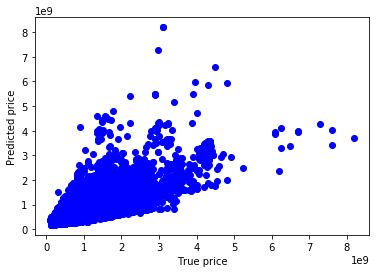

In [18]:
plt.scatter(transaction_real_price.Price, transaction_real_price_hat.Price,color='blue')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()